In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv
/kaggle/input/binary-out-data-lease/binary_out_data.xlsx


# Risk Analysis and Leasing Process Automation

![](https://images.unsplash.com/photo-1707157281599-d155d1da5b4c?q=80&w=1170&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

The aim of this project is to simulate the analytical process in a leasing company. Assessing the risk of the customer portfolio, automating the assessment process and preparing an interactive report. The project is designed to show data analysis, but also to create tools that streamline decision-making processes, which is crucial in the work of a Risk Analyst.


Here are the variable names and their descriptions, focusing on the context of a loan application.

**X1 - loan_id:** Loan ID. A unique identifier for each loan application.

**X2 - no_of_dependents:** Number of Dependents. The number of people financially dependent on the applicant.

**X3 - education:** Education. The applicant's highest level of education.

**X4 - self_employed:** Self Employed. A yes/no flag indicating if the applicant is self-employed.

**X5 - income_annum:** Annual Income. The applicant's total yearly income.

**X6 - loan_amount:** Loan Amount. The total amount of the loan requested by the applicant.

**X7 - loan_term:** Loan Term. The duration of the loan in years.

**X8 - cibil_score:** CIBIL Score. A numerical score representing the applicant's credit history and creditworthiness. A higher score indicates a better credit history.

**X9 - residential_assets_value:** Residential Assets Value. The monetary value of the applicant's residential property.

**X10 - commercial_assets_value:** Commercial Assets Value. The monetary value of the applicant's commercial property.

**X11 - luxury_assets_value:** Luxury Assets Value. The monetary value of the applicant's luxury possessions.

**X12 - bank_asset_value:** Bank Assets Value. The monetary value of the applicant's assets held in the bank.

**Y - loan_status:** Loan Status. The final decision on the loan application (Approved or Rejected). This is the variable you will be predicting. 
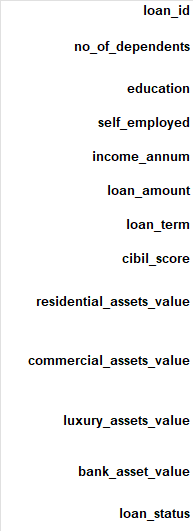
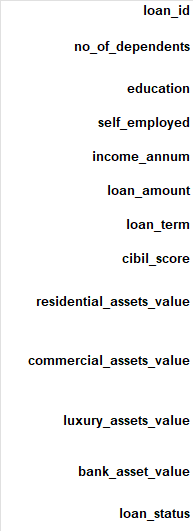
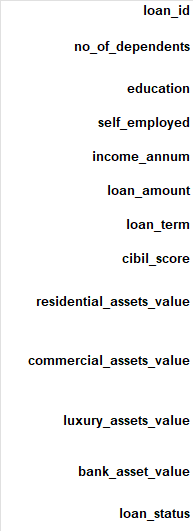
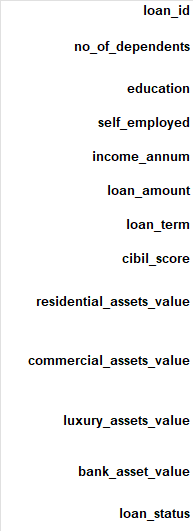
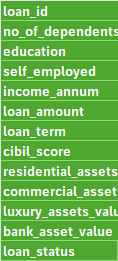
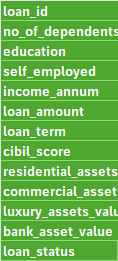
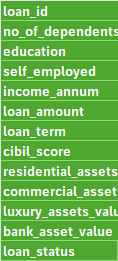
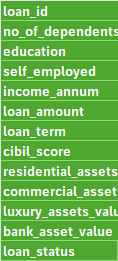
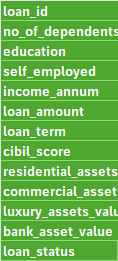
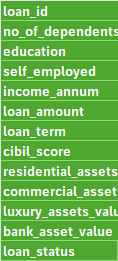
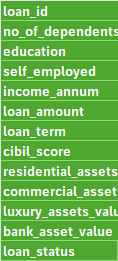
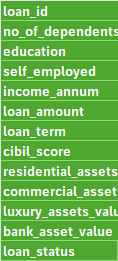

## 1. ELEMENTARY ANALYSIS AND DATA CLEANING

****Importing modules and additions****

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

****Importing dataset****

In [3]:
df = pd.read_csv("/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv")
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


First five rows

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Last five rows

In [5]:
df.tail()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


Columns names

In [6]:
names = list(df.columns.values)

for i, el in enumerate(names):
    if i == len(names)-1:
        print("Y: ", el)
    else:
        print(f"Column {i}:",el)

Column 0: loan_id
Column 1:  no_of_dependents
Column 2:  education
Column 3:  self_employed
Column 4:  income_annum
Column 5:  loan_amount
Column 6:  loan_term
Column 7:  cibil_score
Column 8:  residential_assets_value
Column 9:  commercial_assets_value
Column 10:  luxury_assets_value
Column 11:  bank_asset_value
Y:   loan_status


The number of rows in the dataset

In [7]:
df['loan_id'].count()

4269

Check if the ID is DISTINCT loan_id

In [8]:
pd.DataFrame(df['loan_id'].unique()).count().values[0]

4269

Descriptive Information

In [9]:
for i in df.columns:
    print(f"Descriptive Information about: {i}")
    print("\n")
    print(df[i].info())
    print("\n")
    print(df[i].describe())
    print("\n\n")

Descriptive Information about: loan_id


<class 'pandas.core.series.Series'>
RangeIndex: 4269 entries, 0 to 4268
Series name: loan_id
Non-Null Count  Dtype
--------------  -----
4269 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB
None


count    4269.000000
mean     2135.000000
std      1232.498479
min         1.000000
25%      1068.000000
50%      2135.000000
75%      3202.000000
max      4269.000000
Name: loan_id, dtype: float64



Descriptive Information about:  no_of_dependents


<class 'pandas.core.series.Series'>
RangeIndex: 4269 entries, 0 to 4268
Series name:  no_of_dependents
Non-Null Count  Dtype
--------------  -----
4269 non-null   int64
dtypes: int64(1)
memory usage: 33.5 KB
None


count    4269.000000
mean        2.498712
std         1.695910
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         5.000000
Name:  no_of_dependents, dtype: float64



Descriptive Information about:  education


<class 'pandas.core.series.Serie

Count by Group by Dependents Value

In [10]:
pdNoOfDependendts = pd.DataFrame(df.iloc[0:, 0:2].groupby(df.iloc[0:, 1])['loan_id'].count())
pdNoOfDependendts.rename(columns={'loan_id': 'Count'}, inplace=True)
pdNoOfDependendts.index.names = ['Dependents Number']
pdNoOfDependendts

,Count
Dependents Number,
0,712
1,697
2,708
3,727
4,752
5,673


Count by Group by Dependents Value - Sorted

In [11]:
pdNoOfDependendts.sort_values("Count", ascending=False)

,Count
Dependents Number,
4,752
3,727
0,712
2,708
1,697
5,673


In [12]:
df.columns.values

array(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype=object)

Column names have additional space - Clean and repair

In [13]:
elements = list(df.columns.values)
elements_trimed = []
for el in elements:
    elements_trimed.append(el.strip())
elements_trimed

['loan_id',
 'no_of_dependents',
 'education',
 'self_employed',
 'income_annum',
 'loan_amount',
 'loan_term',
 'cibil_score',
 'residential_assets_value',
 'commercial_assets_value',
 'luxury_assets_value',
 'bank_asset_value',
 'loan_status']

In [14]:
for i in range(0, len(elements)):
    df.rename(columns={elements[i]: elements_trimed[i]}, inplace=True)

In [15]:
df.columns.values

array(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype=object)

In [16]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [17]:
df['education'].unique()

array([' Graduate', ' Not Graduate'], dtype=object)

In [18]:
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.str.strip() if x.dtype == object else x
    return df.apply(trim_strings)

In [19]:
df = trim_all_columns(df)
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [20]:
df['education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [21]:
df

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [22]:
df.to_csv("out_data.csv", index=True)

**Next, change columns to binary in excel...**

In [25]:
df2 = pd.read_excel("/kaggle/input/binary-out-data-lease/binary_out_data.xlsx", index_col=0)
df2.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [26]:
df2

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4265,5,1,1,1000000,2300000,12,317,2800000,500000,3300000,800000,0
4266,0,0,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1
4267,2,0,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,0


## 2. CREATING A PREDICTIVE MODEL

Divide Data into X and Y variables (Independent and Dependent)

In [32]:
X = df2.drop('loan_status', axis=1)
Y = df2['loan_status']
X.head(),Y.tail()

(         no_of_dependents  education  self_employed  income_annum  \
 loan_id                                                             
 1                       2          1              0       9600000   
 2                       0          0              1       4100000   
 3                       3          1              0       9100000   
 4                       3          1              0       8200000   
 5                       5          0              1       9800000   
 
          loan_amount  loan_term  cibil_score  residential_assets_value  \
 loan_id                                                                  
 1           29900000         12          778                   2400000   
 2           12200000          8          417                   2700000   
 3           29700000         20          506                   7100000   
 4           30700000          8          467                  18200000   
 5           24200000         20          382             

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [37]:
from sklearn.metrics import accuracy_score, classification_report
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of model: {accuracy:.2f}")

Accuracy of model: 0.63


As we can see accuracy of the logistic regression model is too low. I need to change predictive model type. I will check DecisionTreeClasifier.

In [40]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.67      0.01      0.01       318
           1       0.63      1.00      0.77       536

    accuracy                           0.63       854
   macro avg       0.65      0.50      0.39       854
weighted avg       0.64      0.63      0.49       854



In [41]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [42]:
Y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy of model: {accuracy:.2f}")

Accuracy of model: 0.98


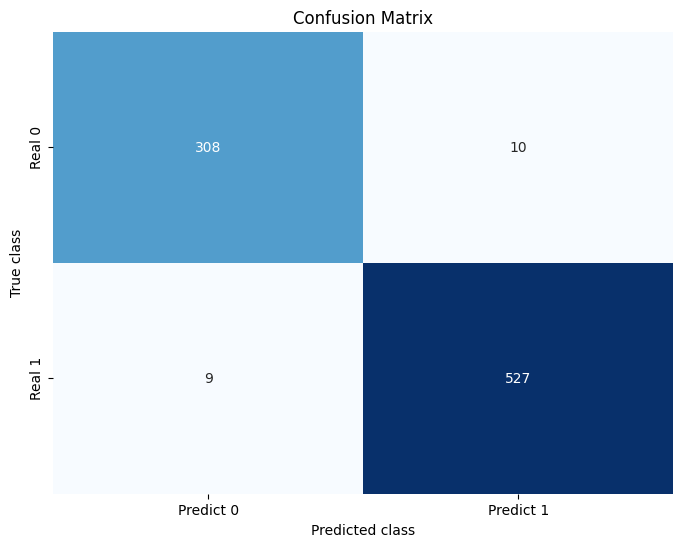

In [47]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predict 0', 'Predict 1'],
            yticklabels=['Real 0', 'Real 1'])
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion Matrix')
plt.show()

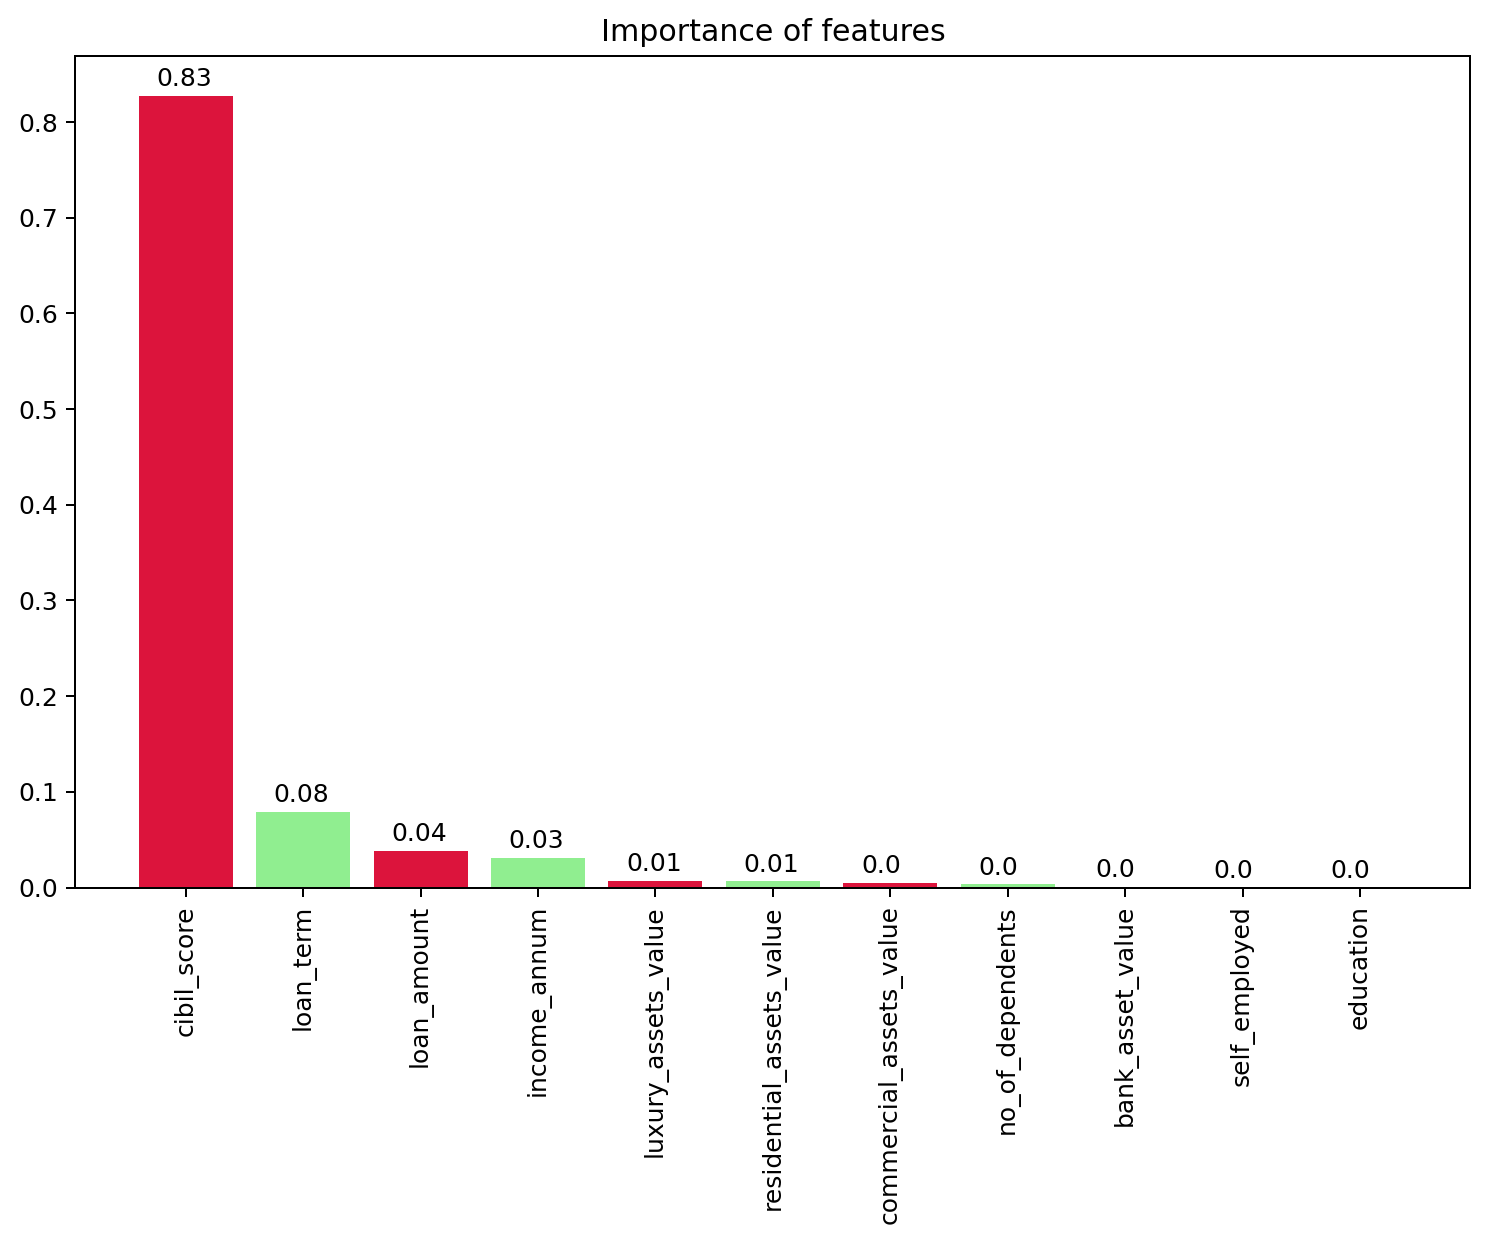

In [78]:
importances = dt_model.feature_importances_
feature_names = X_train.columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6), dpi=180)
plt.title("Importance of features")
plt.bar(range(X_train.shape[1]), importances[indices], align="center", color=['crimson', 'lightgreen'])
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)

for index, value in enumerate(importances[indices]):
    plt.text(index-0.25, value+0.01, str(round(value, 2)))

plt.show()

In [79]:
df2.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,,,,,,,,,,,,
1,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1
2,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0
3,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0
4,3,1,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0
5,5,0,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0


In [109]:
row_to_predict = pd.DataFrame([[3, 0, 0, 2100000, 3100000, 36, 431, 1400000, 11600000, 100000, 250000]], columns=X.columns)
row_to_predict

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,3,0,0,2100000,3100000,36,431,1400000,11600000,100000,250000


In [115]:
row_to_predict_output = dt_model.predict(row_to_predict)
print(f"Decission: {row_to_predict_output[0]}")

Decission: 0


In [116]:
row_to_predict2 = pd.DataFrame([[1, 1, 1, 4100000, 3100000, 36, 781, 1400000, 11600000, 100000,9250000]], columns=X.columns)
row_to_predict2

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,1,1,1,4100000,3100000,36,781,1400000,11600000,100000,9250000


In [117]:
row_to_predict_output2 = dt_model.predict(row_to_predict2)
print(f"Decission: {row_to_predict_output2[0]}")

Decission: 1



#### The model predicts customer applications with high accuracy. DecisionTreeClassifier improves the accuracy of value prediction from 0.68 in the logistic regression model to 0.98. 
#### The most important variables are cibil_score and loan_term.